## Introduction
In my previous capstone project-Wine Quality Prediction, I have built models for evaluating the wine quality using supervised machine learning technique. Through my models, I have drawn conclusions that the random forest model is the best for predicting wine quality. Also, I have given the top three most important features of alcohol, volatile acidity and density (sugar content). The data set I used for this project was gathered based on the wine physicochemical tests and no any data about grape types, wine brand, wine selling price, wine review and description, country and so on.

In this final project, I have gathered wine data about alcohol content, wine selling price, wine brand, grape types, country, taster review and so on. Combined with my previous project, I plan to explore how those factors such as grape types and taster review affect wine quality and wine price. The data set has been scraped from Wine Enthusiast. They provide wine description, rating points, wine price, alcohol content, variety, appellation/country, winery, designation, category and so on.

## Objectives
The objectives of the project are to explore:

  1. The relationship between wine rating points and wine price;
  2. The distribution for wine price with alcohol, wine variety(grape types), country, etc.;
  3. Wine rating points prediction using wine description text data and NLP supervised technique;
  4. Topic extraction for wine review using NLP unsupervised technique.

## Methodologies
  1. Data collection using Python Scrapy;
  2. Visualization using matplotlib, seaborn, plotly, word cloud, pyLDAvis, etc.;
  3. Supervised learning: linear regression, random forest algorithm, gradient boost, support vector machines, etc.;
  4. Unsupervised learning: clustering
  5. Natural language Processing: BOW, TfidfVect, LSA, LDA, NNMF etc.

The biggest challenge for the project attempts to web scrape data and data preprocess such as data cleaning.

## Data Gathering

The data gathered for this project was scraped from the website of Wine Enthusiast. The scraper tool used here is Python Scrapy library. The codes were written in Vs Code and scrapy was run in the command line instead of jupyter notebook. Scrapy Xpath expression was used here: The Xpath expression treats nested code like computer file paths, with each level referred to as a 'node'. Also, the CSV file format was used for storing the collected data. Note here, the wine enthusiast website shows the review pages up to 14145. But there are actually less than that many pages and more duplicate outputs. So the pages for this project data set stopped at page 2000. The data set obtained contains 13 columns and 37235 rows of wine reviews.

The more details about the Scrapy codes, website URL and csv files and so on can be seen in anther folder which has been uploaded on my Github account.

## Import Library

In [1]:

import pandas as pd
import numpy as np
import scipy
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF
import pyLDAvis
import pyLDAvis.sklearn
import plotly
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.io as pio
import time
import warnings
warnings.filterwarnings('ignore')
import squarify
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk

sns.set()

/Users/p0z00cx/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/p0z00cx/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


## Load Dataset

In [2]:
wine_orig0_df = pd.read_csv('winereview0.csv')
wine_orig1_df = pd.read_csv('winereview1.csv')
wine_orig2_df = pd.read_csv('winereview2.csv')
wine_orig3_df = pd.read_csv('winereview3.csv')
wine_orig_df = pd.concat([wine_orig0_df, wine_orig1_df,wine_orig2_df, wine_orig3_df], axis=0)
wine_orig_df.index = range(len(wine_orig_df.index))
wine_orig_df.head(3)

,title,rating_points,description,taster_name,price,designation,variety,appellation,country,winery,alcohol,bottle_size,category
0,Au Pied du Mont Chauve 2017 La Maltroie Premie...,92,A shy nose on this wine reveals hints of Mirab...,Anne Krebiehl MW,"$80,",La Maltroie Premier Cru,Chardonnay,Chassagne-Montrachet,France,Au Pied du Mont Chauve,13%,750 ml,White
1,Au Pied du Mont Chauve 2017 Les Caillerets Pre...,92,A mere whiff of creamy lemon appears on the sh...,Anne Krebiehl MW,"$90,",Les Caillerets Premier Cru,Chardonnay,Chassagne-Montrachet,France,Au Pied du Mont Chauve,13.5%,750 ml,White
2,Château de Laborde 2017 Cuvée K (Hautes Côtes...,91,Hints of butter and toast on the nose become m...,Anne Krebiehl MW,"$30,",Cuvée K,Chardonnay,Hautes Côtes de Nuits,France,Château de Laborde,13%,750 ml,White


In [3]:
wine_orig_df.shape

(38571, 13)

## Clean Data (excluding Text)

In [4]:
# Check the dataset has duplicates or not.
# Check "title" column. 
print('unique =',wine_orig_df['title'].nunique())
print('duplicates =',wine_orig_df['title'].duplicated().sum())

unique = 31773
duplicates = 6798


The original dataset has 31773 rows and 13 columns, and it also does contain dupicates. Next remove the duplicats from the dataset.

## Remove the duplicates of data set

In [5]:
# Drop duplicates and rename data set.
wine_raw_df = wine_orig_df.drop_duplicates(subset=['title'])

# check data set info
wine_raw_df.shape

(31773, 13)

After removed the duplicates from the title column, the data set has 31773 rows. But it is still necessary to check if there are more duplicates in other columns.

In [6]:
# Check "description" column duplicates.
print('duplicates =',wine_raw_df['description'].duplicated().sum())

# Drop duplicates and rename data set.
wine_raw_df = wine_raw_df.drop_duplicates(subset=['description'])

# check data set info again.
wine_raw_df.shape

duplicates = 9


(31764, 13)

Now we have the data set with 31764 rows without duplicates

In [7]:
wine_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31764 entries, 0 to 38568
Data columns (total 13 columns):
title            31764 non-null object
rating_points    31764 non-null int64
description      31764 non-null object
taster_name      31548 non-null object
price            31764 non-null object
designation      24418 non-null object
variety          31764 non-null object
appellation      31764 non-null object
country          31764 non-null object
winery           31764 non-null object
alcohol          31360 non-null object
bottle_size      31764 non-null object
category         31764 non-null object
dtypes: int64(1), object(12)
memory usage: 3.4+ MB


In [8]:
wine_raw_df.isnull().sum()

title               0
rating_points       0
description         0
taster_name       216
price               0
designation      7346
variety             0
appellation         0
country             0
winery              0
alcohol           404
bottle_size         0
category            0
dtype: int64

In [9]:
wine_preclean_df = wine_raw_df.copy()

In [10]:
# Clean price type from object to float.
wine_preclean_df['price'] = wine_preclean_df['price'].str.replace(u'\xa0', u'')
wine_preclean_df['price'] = wine_preclean_df['price'].str.replace('$','')
wine_preclean_df['price'] = wine_preclean_df['price'].str.replace(',','')
wine_preclean_df['price'] = wine_preclean_df['price'].str.replace('N/A','NaN')
wine_preclean_df['price'] = wine_preclean_df['price'].astype(float)
wine_preclean_df['price'].head()

0    80.0
1    90.0
2    30.0
3    60.0
4     9.0
Name: price, dtype: float64

In [11]:
# Clean alcohol column.
wine_preclean_df['alcohol'] = wine_preclean_df.alcohol.str.replace('%', '').astype(float)
wine_preclean_df['alcohol'].head()

0    13.0
1    13.5
2    13.0
3    13.5
4    13.0
Name: alcohol, dtype: float64

## Clean missing value and outliers

In [12]:
# Check missing values.
wine_preclean_df.isnull().sum()

title               0
rating_points       0
description         0
taster_name       216
price            1548
designation      7346
variety             0
appellation         0
country             0
winery              0
alcohol           404
bottle_size         0
category            0
dtype: int64

In [13]:
# Drop price and alcohol missing value.
wine_preclean_df = wine_preclean_df.dropna(subset=['price','alcohol'])
wine_preclean_df.isnull().sum()

title               0
rating_points       0
description         0
taster_name       195
price               0
designation      6861
variety             0
appellation         0
country             0
winery              0
alcohol             0
bottle_size         0
category            0
dtype: int64

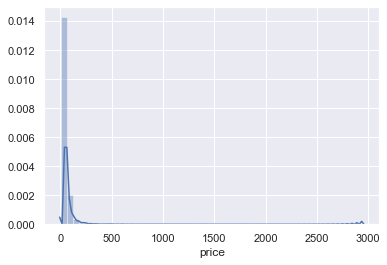

In [14]:
sns.distplot(wine_preclean_df['price'])

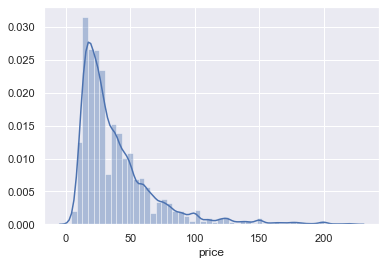

In [15]:
# Remove the outliers for wine price
q = wine_preclean_df['price'].quantile(0.99)
wine_preclean_df1 = wine_preclean_df[wine_preclean_df['price'] <q]
sns.distplot(wine_preclean_df1['price'])

In [16]:
wine_preclean_df1.shape

(29511, 13)

In [17]:
# Calculate the percentage for removing data
removedata_percentage = (wine_raw_df.shape[0]-wine_preclean_df1.shape[0])/wine_raw_df.shape[0]*100
removedata_percentage

7.092935398564412

In [18]:
# Check the wine alcohol outliers
wine_preclean_df1['alcohol'].describe()

count    29511.000000
mean        14.317029
std         49.745704
min          2.500000
25%         13.000000
50%         13.500000
75%         14.300000
max       5480.000000
Name: alcohol, dtype: float64

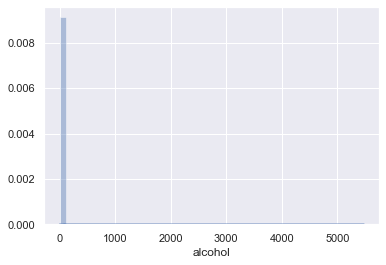

In [19]:
sns.distplot(wine_preclean_df1['alcohol'])

In [20]:

# Check the wine alcohol outliers
wine_preclean_df1['alcohol'].describe()

count    29511.000000
mean        14.317029
std         49.745704
min          2.500000
25%         13.000000
50%         13.500000
75%         14.300000
max       5480.000000
Name: alcohol, dtype: float64

In [21]:
wine_preclean_df1['alcohol'][wine_preclean_df1['alcohol'] > 30].value_counts().sort_values(ascending=False)

90.0      4
88.0      3
87.0      2
89.0      2
92.0      2
120.0     1
2013.0    1
124.8     1
40.0      1
49.0      1
128.0     1
97.0      1
145.0     1
1190.0    1
272.0     1
2017.0    1
2300.0    1
330.0     1
91.0      1
350.0     1
2012.0    1
4920.0    1
86.0      1
5480.0    1
Name: alcohol, dtype: int64

In [22]:
warnings.filterwarnings('ignore')

# Replace outliers for alcohol content
wine_preclean_df1['alcohol'][wine_preclean_df1['alcohol']>30] = 28
wine_preclean_df1['alcohol'].describe()

count    29511.000000
mean        13.570568
std          1.288626
min          2.500000
25%         13.000000
50%         13.500000
75%         14.300000
max         28.000000
Name: alcohol, dtype: float64

In [23]:
# Check data set info after cleaning outliers and missing value 
print(wine_preclean_df1.shape)
wine_preclean_df1.info()

(29511, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29511 entries, 0 to 38568
Data columns (total 13 columns):
title            29511 non-null object
rating_points    29511 non-null int64
description      29511 non-null object
taster_name      29322 non-null object
price            29511 non-null float64
designation      22723 non-null object
variety          29511 non-null object
appellation      29511 non-null object
country          29511 non-null object
winery           29511 non-null object
alcohol          29511 non-null float64
bottle_size      29511 non-null object
category         29511 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 3.2+ MB


In [24]:
# Copy dataset and rename it again for EDA 
wine_df = wine_preclean_df1.copy()

## Exploratory Data Analysis (EDA)

In [25]:
# Check numerical columns basic info
wine_df.describe()

,rating_points,price,alcohol
count,29511.000000,29511.000000,29511.000000
mean,89.416048,38.929562,13.570568
std,2.928643,30.021518,1.288626
min,80.000000,4.000000,2.500000
25%,87.000000,19.000000,13.000000
50%,90.000000,30.000000,13.500000
75%,91.000000,49.000000,14.300000
max,100.000000,222.000000,28.000000


In [26]:
# Plot price and rating_points using plotly

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.io as pio

data = go.Scatter(x=wine_df.head(1000)['rating_points'], y=wine_df.head(1000)['price'], mode='markers')

layout = go.Layout({
  "xaxis": {
    "title": {"text": "Rating_points"} 
  }, 
  "yaxis": {
    "title": {"text": "Price, $"}, 
  }
})

fig = go.Figure(data=data, layout=layout)

pio.write_html(fig, file='price_rating.html', auto_open=True)

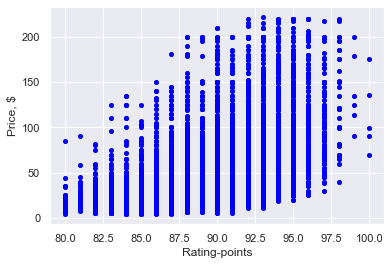

In [27]:
# Plot all the data points for rating_points and price
plt.plot(wine_df['rating_points'], wine_df['price'], 'o', color='blue', markersize=4)
plt.ylabel('Price, $', fontsize=12)
plt.xlabel('Rating-points', fontsize=12)

plt.show()

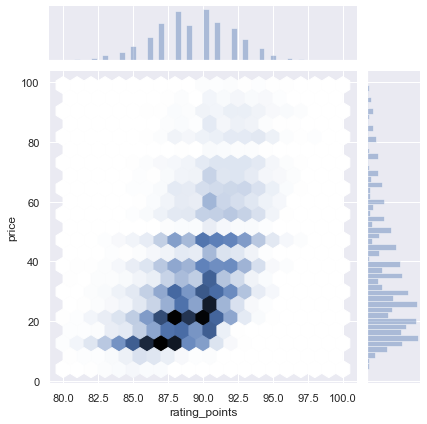

In [28]:

sns.jointplot(x='rating_points', y='price',  data=wine_df[wine_df['price']< 100], kind='hex', gridsize=20)

The above figure shows that the price for most of wines is in the range of \$10 ~ \\$40. This is reasonable for the market needs. The rating points are also most likely in the range of 85 to 92, not very low not very high.

In addition, it shows that the price can be varied from low price such as \$5 to high price \\$150 or even more than \$200 at a fixed rating point. This indicates that the wine price might be affected by other factors such as wine variety, country and so on and further investigation should be conducted. This is also a good feature for wine consumers because they can buy wines with low price and high rating points.

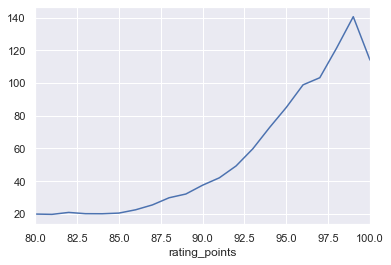

In [29]:
# Explore the relationship between rating_points and price using mean price values.
wine_df.groupby(['rating_points']).price.mean().plot()

From the above mean price with rating_points plot, it can be seen that in general, the wine price increases with rating points. It also can be pointed out that the rating_points in the 80-90, the mean of wine price increases not very much about from \$20 to \\$39. However, it increases very fast from \$40 to \\$140 (sharp slope as shown in the figure) after rating_points more than 90.

## 2. Alcohol and Category

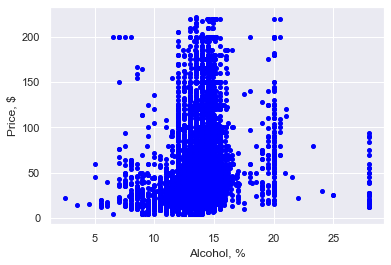

In [30]:

# Plot all the data points for alcohol content and price
plt.plot(wine_df['alcohol'], wine_df['price'], 'o', color='blue', markersize=4)
plt.ylabel('Price, $', fontsize=12)
plt.xlabel('Alcohol, %', fontsize=12)

plt.show()

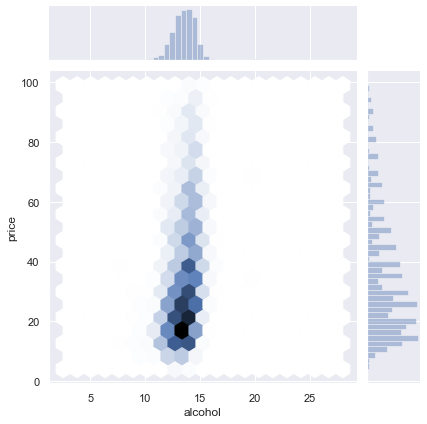

In [31]:
# Plot alcohol with price
sns.jointplot(x='alcohol', y= 'price', data = wine_df[wine_df['price']<100], kind = 'hex',gridsize=20)

From the above joint plot, it can be seen that for wine, the most alcohol content is about 10-15% (especially in 11-13%), and price is in the range of 15-40$.

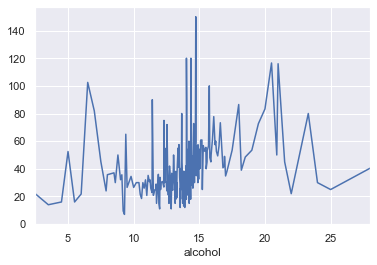

In [32]:
wine_df.groupby(['alcohol']).price.mean().plot()

#### Wine category

In [33]:

# Check wine category.
print(wine_df['category'].nunique())
wine_df['category'].value_counts()

7


Red            16409
White           9209
Sparkling       1733
Rose            1619
Dessert          333
Port/Sherry      173
Fortified         35
Name: category, dtype: int64

In this dataset, there are seven category for wines. The red wines have the largest number, followed by white and Rose.

In [34]:
# Examine alcohol content for each category.
wine_df.groupby(['category']).alcohol.mean().sort_values()

category
Sparkling      12.012331
Dessert        12.320781
Rose           12.881909
White          13.046513
Red            14.052209
Fortified      17.905714
Port/Sherry    19.365896
Name: alcohol, dtype: float64

In [35]:
# Check the mean price for each category.
wine_df.groupby(['category']).price.mean().sort_values()

category
Rose           20.622600
White          30.712085
Sparkling      43.465089
Dessert        43.945796
Red            44.315972
Fortified      74.400000
Port/Sherry    74.514451
Name: price, dtype: float64

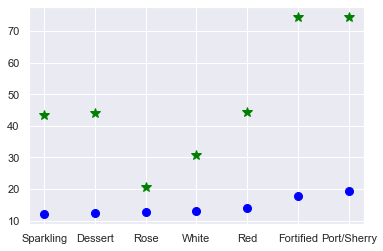

In [36]:
# Plot category with alcohol content and price.
plt.plot(wine_df.groupby(['category']).alcohol.mean().sort_values(),'o', color='blue', markersize=8, label="alcohol")
plt.plot(wine_df.groupby(['category']).price.mean().sort_values(), '*', color='green', markersize=10, label="price")

The alcohol content in the Sparkling is lowest and in Port/Sherry highest. Also, in general, the wine price increases with the alcohol content increases. Port/Sherry has highest price. For special wines such as Sparkling and Dessert, they have high price indicating wine price varied and affected by many factors.

Index(['Sparkling', 'Dessert', 'Rose', 'White', 'Red', 'Fortified',
       'Port/Sherry'],
      dtype='object', name='category')
Index(['Sparkling', 'Dessert', 'Rose', 'White', 'Red', 'Fortified',
       'Port/Sherry'],
      dtype='object', name='category')


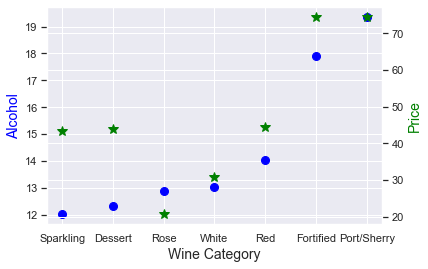

In [37]:
fig, ax = plt.subplots()

x = wine_df.groupby(['category']).alcohol.mean().sort_values().index
y = wine_df.groupby(['category']).alcohol.mean().sort_values().get_values()
ax.plot( x, y,'o', color='blue', markersize=8, label="alcohol")

print(x)
# set x-axis label
ax.set_xlabel("Wine Category",fontsize=14)
# set y-axis label
ax.set_ylabel("Alcohol",color="blue",fontsize=14)

# Set up the second plot
ax2=ax.twinx()
df2 = wine_df.groupby(['category']).price.mean().sort_values()
x1 = df2.reindex(x).index
y1 = df2.reindex(x).get_values()
print(x1)
# make a plot with different y-axis using second axis object
ax2.plot(x1,y1, '*', color='green', markersize=10, label="price")
ax2.set_ylabel("Price",color="green",fontsize=14)
plt.show()

## 3. Country

In [38]:
# Gather countries info for wines review.
print(wine_df['country'].nunique())

# Count countries number.
wine_df['country'].value_counts().head(10)

37


US           11790
France        6283
Italy         4006
Portugal      1839
Spain         1400
Australia      744
Austria        730
Argentina      641
Germany        527
Chile          482
Name: country, dtype: int64

In [39]:
# Map wine produce countries using plotly
import plotly.express as px
import plotly.offline  

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go

df = wine_df['country'].replace("US", "United States").value_counts()

#iplot([go.Choropleth(
    #locationmode='country names',
    #locations=df.index.values,
    #text=df.index,
    #z=df.values
#)])

data = go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)

fig = go.Figure(data=data)

pio.write_html(fig, file='countrymap.html', auto_open=True)

From the above figure, it can be seen that in this data set, US is the top country for wines review, followed by France and Italy.

In [40]:
wine_df.groupby(['country']).price.mean().sort_values(ascending=False)

country
Mexico                    100.000000
England                    61.836364
Canada                     58.638298
US                         42.886159
Italy                      42.884174
Germany                    39.519924
Australia                  39.098118
France                     38.267309
South Africa               37.585106
Switzerland                35.050000
Austria                    32.741096
Israel                     31.659794
New Zealand                31.029289
Hungary                    30.884615
Serbia                     29.800000
Spain                      29.598571
Portugal                   29.022295
Croatia                    28.620690
Uruguay                    27.216867
Turkey                     26.709677
Argentina                  26.609984
Chile                      25.199170
Lebanon                    24.571429
Slovenia                   23.000000
Greece                     22.972973
Brazil                     22.400000
Georgia                    22.

                   price
country                 
Mexico        100.000000
England        61.836364
Canada         58.638298
US             42.886159
Italy          42.884174
Germany        39.519924
Australia      39.098118
France         38.267309
South Africa   37.585106
Switzerland    35.050000


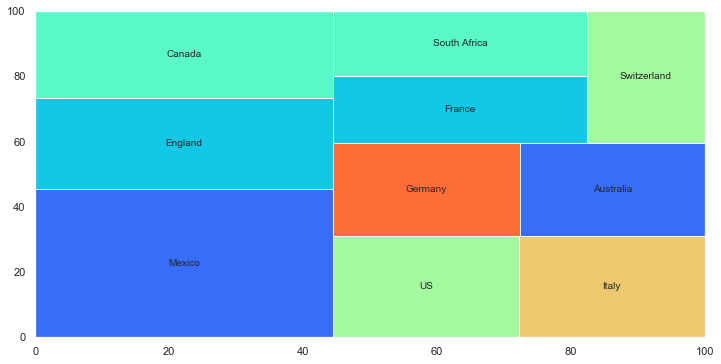

In [41]:
# Examine the mean price of wines for each country.

cp = pd.DataFrame(wine_df.groupby(['country']).price.mean().sort_values(ascending=False))
print(cp.head(10))


# Plot treemap for country and mean price.

import squarify

plt.figure(figsize=(12,6))
squarify.plot(cp['price'].head(10),color=sns.color_palette('rainbow'),label=cp.head(10).index)
plt.show()


From the above analysis, The average price of wine in Mexico is highest, followed by Canada and Peru. US is the fourth expensive country.


## 4. Variety
A variety is the type of grape. It is written here with a lower-case initial. If only one variety is mentioned on the bottle label, then the wine is called varietal and is named after the grape with a capital initial (Riesling, Pinot Noir, etc.). A varietal wine primarily shows the fruit: the grape variety dominates the wine flavour.(From:http://frenchscout.com/types-of-wines)

In [42]:
# Find the number of wine variety or grape types
wine_df['variety'].nunique()

450

In [43]:
# Calculate wine varity number.
wine_df['variety'].value_counts().head(10)

Pinot Noir                  3044
Chardonnay                  2311
Cabernet Sauvignon          1770
Red Blends                  1665
Rosé                        1321
Bordeaux-style Red Blend    1186
Sauvignon Blanc             1026
Riesling                     940
Nebbiolo                     832
Portuguese Red               734
Name: variety, dtype: int64

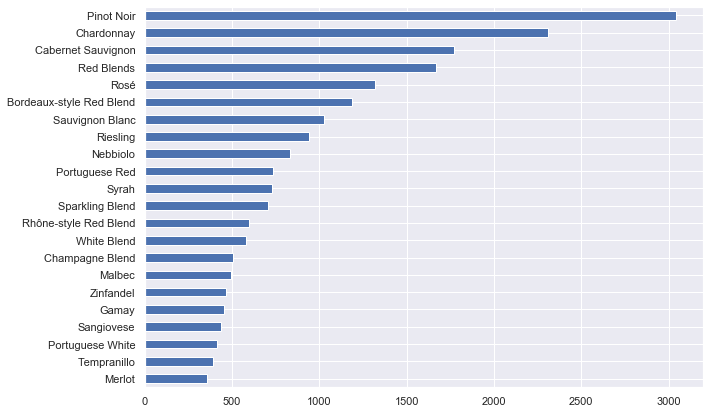

In [44]:
# Plot the wine variety for top 22 variety. 
plt.figure(figsize=(10,7))
wine_df['variety'].value_counts().head(22).sort_values().plot.barh()
plt.show()

Pinot Noir is the first place for making wine. Next is Chardonnay, the third is Red Blends. Cabernet Sauvignon is the fourth place. And Merlot a little bit behind, in 22nd.

In [45]:
# Check most popular regions (US, French and Italy) and grapes
wine_df.groupby(['country']).variety.value_counts().sort_values(ascending=False).head(15)

country   variety                 
US        Pinot Noir                  2392
          Cabernet Sauvignon          1385
          Chardonnay                  1321
Italy     Nebbiolo                     811
France    Bordeaux-style Red Blend     746
Portugal  Portuguese Red               733
US        Red Blends                   729
France    Rosé                         691
          Chardonnay                   668
US        Syrah                        586
Italy     Red Blends                   495
US        Zinfandel                    464
France    Champagne Blend              453
          Gamay                        450
US        Sauvignon Blanc              432
Name: variety, dtype: int64


In US, the most three grapes are Pinor Noir, Cabernet Sauvignon and Chardonnay. In France: Bordeaux-style Red Blend, Rosé, and Gamay. In Italy: Red Blends, Nebbiolo, Sangiovese.

In [46]:
# Examine the relationship between varity and price.
wine_df.groupby(['variety']).price.describe().sort_values(['count'],ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
variety,,,,,,,,
Pinot Noir,3044.0,49.841153,27.489523,5.0,30.0,46.0,63.0,210.0
Chardonnay,2311.0,42.420588,30.560099,5.0,22.0,35.0,50.0,222.0
Cabernet Sauvignon,1770.0,55.918633,44.757408,4.0,21.0,40.0,75.0,220.0
Red Blends,1665.0,36.306000,24.342854,5.0,20.0,30.0,45.0,185.0
Rosé,1321.0,20.436783,10.699436,5.0,15.0,18.0,24.0,190.0
Bordeaux-style Red Blend,1186.0,44.440126,37.955811,8.0,20.0,30.0,55.0,220.0
Sauvignon Blanc,1026.0,25.035078,12.919295,4.0,16.0,23.0,30.0,159.0
Riesling,940.0,35.560638,26.542059,5.0,19.0,28.0,45.0,200.0
Nebbiolo,832.0,74.050481,36.551859,15.0,50.0,65.0,90.0,200.0


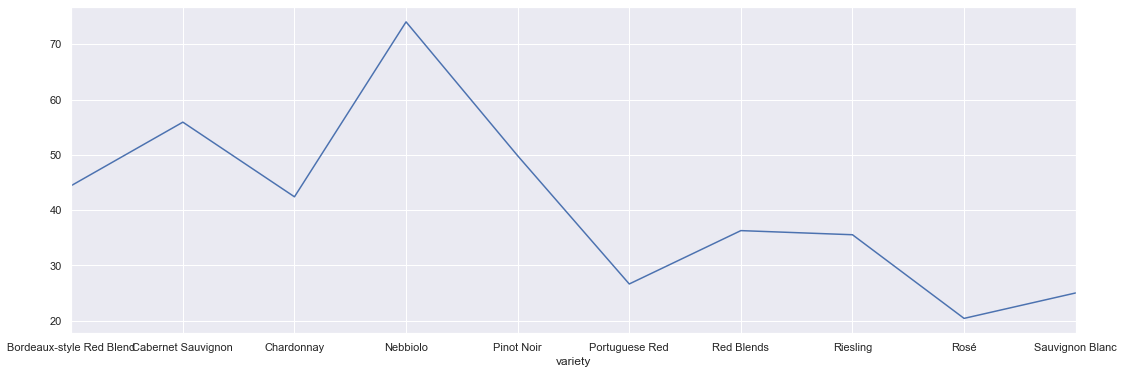

In [47]:
variety_df = wine_df[wine_df['variety'].isin(wine_df['variety'].value_counts().head(10).index)]
variety_df.groupby(['variety']).price.mean().plot(figsize=(18,6))

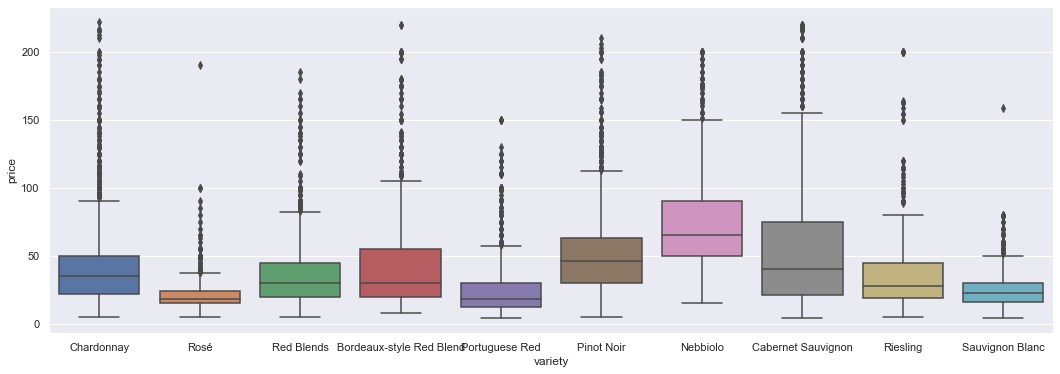

In [48]:
# Examine the relationship for varity and rating points.
variety_df = wine_df[wine_df['variety'].isin(wine_df['variety'].value_counts().head(10).index)]

plt.figure(figsize=(18,6))
sns.boxplot(x='variety',y='price', data=variety_df)

plt.show()

From the above price boxplot, the average price for most popular wines is in the range of \$20 to \\$50 indicating there are not very expensive and suitable for the market and most consumers' needs.

In [49]:
# Examine the relationship for varity and rating points.
wine_df.groupby(['variety']).rating_points.describe().sort_values(['count'],ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
variety,,,,,,,,
Pinot Noir,3044.0,90.473062,2.747854,80.0,89.0,91.0,92.0,99.0
Chardonnay,2311.0,89.645175,2.915182,80.0,88.0,90.0,92.0,98.0
Cabernet Sauvignon,1770.0,89.189831,3.040170,80.0,87.0,89.0,91.0,98.0
Red Blends,1665.0,88.800000,2.746764,80.0,87.0,89.0,91.0,99.0
Rosé,1321.0,87.767600,2.454997,81.0,86.0,88.0,90.0,94.0
Bordeaux-style Red Blend,1186.0,89.457841,2.853733,80.0,88.0,90.0,91.0,98.0
Sauvignon Blanc,1026.0,88.491228,2.598390,80.0,87.0,88.0,90.0,96.0
Riesling,940.0,91.068085,3.018163,81.0,89.0,91.0,93.0,98.0
Nebbiolo,832.0,90.594952,2.956259,85.0,88.0,90.0,93.0,98.0


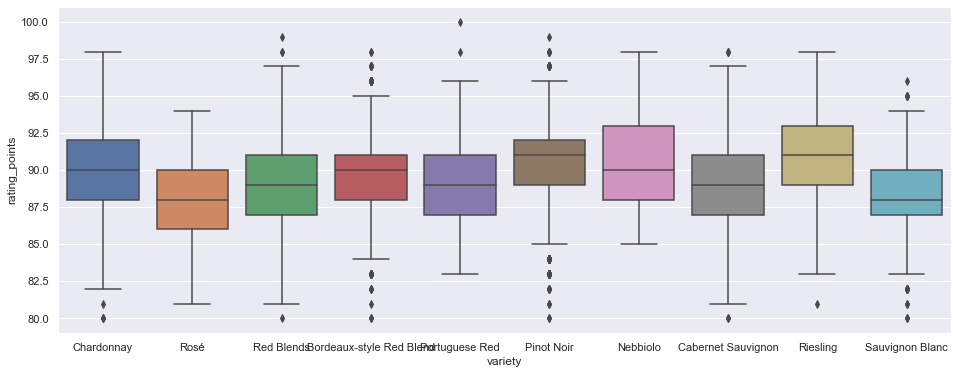

In [50]:
plt.figure(figsize=(16,6))
sns.boxplot(x = 'variety', y ='rating_points', data =variety_df)
plt.show()


The rating_points for most wines is in the range of (86 ~ 93).

For the same wine variety, the price and rating_points are various from low to high. This also gives a good sign for wine consumers that they can buy all kinds of wines with good quality at low price.

###  5. Taster
In this data set, the description for wines is written by wine tasters. In the following sections, I will conduct analysis on wine tasters and the description they wrote to explore how their reviews affect wine rating points and how their reviews can affect the wine consumers' decisions to buy or not buy wines.

In [51]:
# Check numbers of the taster and their names in the data set
print(wine_df['taster_name'].nunique())
wine_df['taster_name'].unique()

19


array(['Anne Krebiehl\xa0MW', 'Roger Voss', 'Jim Gordon', 'Matt Kettmann',
       'Virginie Boone', 'Fiona Adams', 'Kerin O’Keefe',
       'Sean P. Sullivan', nan, 'Anna Lee C. Iijima',
       'Alexander Peartree', 'Paul Gregutt', 'Christina Pickard',
       'Joe Czerwinski', 'Michael Schachner', 'Lauren Buzzeo',
       'Mike DeSimone', 'Jeff Jenssen', 'Carrie Dykes', 'Susan Kostrzewa'],
      dtype=object)

In [52]:
# Check missing values
wine_df['taster_name'].isnull().sum()

189

In total, there have 19 tasters to provide the wine description. Note here, there still some missing values (nan) in taster_name but for simplifying the analysis these missing values were ignored.

In [53]:
wine_df['taster_name'].value_counts()

Roger Voss            6103
Kerin O’Keefe         3477
Matt Kettmann         3013
Virginie Boone        2937
Michael Schachner     2611
Jim Gordon            1988
Anne Krebiehl MW      1827
Paul Gregutt          1690
Sean P. Sullivan      1541
Anna Lee C. Iijima    1227
Christina Pickard      946
Alexander Peartree     733
Lauren Buzzeo          383
Mike DeSimone          216
Jeff Jenssen           203
Fiona Adams            146
Susan Kostrzewa        113
Carrie Dykes            97
Joe Czerwinski          71
Name: taster_name, dtype: int64

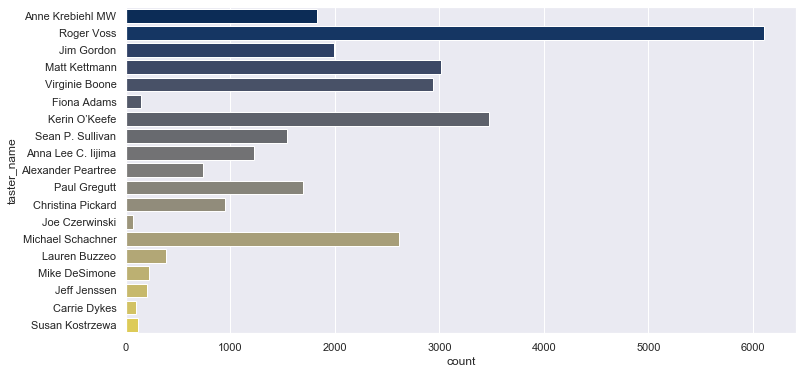

In [54]:
# Plot taster's count
plt.figure(figsize=(12,6))
sns.countplot(y=wine_df['taster_name'],palette = 'cividis' )

From the above countplot, Roger Voss is the leading taster for wine reviews. He has written 5687 wine descriptions in this data set. I will use his descriptions for topic extraction analysis as an example to explore how wine consumers can make decisions based on his wine reviews.

In [55]:
# Check rating points info given by each taster.
wine_df.groupby(['taster_name']).rating_points.describe().sort_values(['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Roger Voss,6103.0,89.205800,2.669539,81.0,87.0,89.0,91.0,100.0
Kerin O’Keefe,3477.0,89.729364,2.723778,82.0,88.0,89.0,91.0,100.0
Matt Kettmann,3013.0,90.370727,2.446974,82.0,88.0,91.0,92.0,97.0
Virginie Boone,2937.0,90.232550,2.917705,80.0,88.0,90.0,92.0,99.0
Michael Schachner,2611.0,87.217158,3.257051,80.0,85.0,87.0,90.0,97.0
Jim Gordon,1988.0,88.844567,2.870022,81.0,87.0,89.0,91.0,100.0
Anne Krebiehl MW,1827.0,91.429119,2.366660,86.0,90.0,92.0,93.0,98.0
Paul Gregutt,1690.0,89.946154,2.436658,81.0,88.0,90.0,92.0,97.0
Sean P. Sullivan,1541.0,88.756652,2.658696,80.0,87.0,88.0,91.0,98.0


In [56]:
# Check wine price info given by each taster.
wine_df.groupby(['taster_name']).price.describe().sort_values(['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Roger Voss,6103.0,34.819925,30.546667,4.0,16.0,25.0,40.00,220.0
Kerin O’Keefe,3477.0,45.029048,34.752975,7.0,20.0,34.0,60.00,200.0
Matt Kettmann,3013.0,42.308599,20.519055,6.0,28.0,40.0,51.00,210.0
Virginie Boone,2937.0,59.359210,37.678124,7.0,34.0,50.0,75.00,220.0
Michael Schachner,2611.0,28.075450,25.516580,4.0,15.0,20.0,30.00,220.0
Jim Gordon,1988.0,28.404427,18.670222,4.0,16.0,25.0,35.00,200.0
Anne Krebiehl MW,1827.0,39.569239,27.413650,10.0,21.0,30.0,49.00,222.0
Paul Gregutt,1690.0,41.416568,23.120898,7.0,25.0,35.0,55.00,195.0
Sean P. Sullivan,1541.0,39.003245,24.283432,5.0,23.0,35.0,46.00,200.0


Both rating points and price given by each taster are varied. This indicates the complexity of wine review and wine price on one hand. The winemakers and wine consumers can get more information and find good deals from tasters' wine description on the other hand.


### Natural Language Processing (NLP) Models

The column of description is given by wine tasters and it is text file. In this project, I will focus on the text data and use natural language processing (NLP) to build supervised models to explore the relationships between wines description and wines rating points. Also, I will use the wine description to perform unsupervised topic exaction to test whether it helps wine consumers to make decision to buy wines and drink now or keep them for later drink or help winemakers to think about when will be the best time to sell their wines based on the points of review from tasters.

In [57]:
# Examine the decription column basic info.
print(wine_df.shape[0])
print(wine_df['description'].isnull().sum())
pd.options.display.max_colwidth = 150
wine_df[['description','taster_name']].head()

29511
0


,description,taster_name
0,A shy nose on this wine reveals hints of Mirabelle and creamy yeast. The palate has smooth and textured gentleness that seems to cushion the entir...,Anne Krebiehl MW
1,"A mere whiff of creamy lemon appears on the shy nose of this wine. The palate keeps the lemon and cream theme on a buffered, rounded body that has...",Anne Krebiehl MW
2,"Hints of butter and toast on the nose become more intense on the slender but beautifully fresh palate. This wine has ease and balance, with stone ...",Anne Krebiehl MW
3,"Mirabelle and cream make for an attractive, inviting nose on this wine. Bright and fresh the palate comes with a tinge of toasty oak amid creamy l...",Anne Krebiehl MW
4,"A fruity confection of strawberry flavors, this wine is softly textured and rounded. The acidity is just enough to give the wine freshness at the ...",Roger Voss


In [58]:
# Check the description info for taster-Roger Voss
wine_df['description'][wine_df.taster_name == 'Roger Voss'].tail(3)

38535    The dry years produced a concentrated wine at this estate. Intense red-currant fruits partners with the crisp acidity. This ripe, full-flavored wi...
38542    For a Provence rosé, this has a definite pink color. It also has plenty of weight to match its colorful character. The raspberry fruit and bright ...
38543    This ripe wine is a blend of Grenache, Syrah, Cinsault and white Vermentino. It offers brilliant red-fruit flavors, crisp acidity and a light, bri...
Name: description, dtype: object

## Text Data Clearning

In [59]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter


In this project, during the text pre-processing what I am going to do:

  1. Lowercase
  2. Removing stopwords, bracket, punctuation and numbers
  
Not to going to use: Lemmatization and Stemming. Stemming removes the last few characters in a word, often leading to incorrect meanings and spelling errors, or making the words un-recognizable. And lemmatization also cause some un-recognizable words, for example: nerthe, proffer, petaluma etc.

I should try not to do too much of text pre-processing for the description text, because most of the description are short (less than 300 words), removing more words risks of losing meaning.

In [60]:
# Clean text data
wine_df['description_c']= wine_df['description'].copy()
wine_df['description_c'] = wine_df['description_c'].str.lower()
wine_df['description_c'] = wine_df['description_c'].str.lower()
wine_df['description_c'] = wine_df['description_c'].str.replace('-','')
wine_df['description_c'] = wine_df['description_c'].str.replace('/','')
wine_df['description_c'] = wine_df['description_c'].str.replace(r'w*\d\w*','')
wine_df['description_c'] = wine_df['description_c'].str.replace('%','')
wine_df['description_c'] = wine_df['description_c'].str.replace(r'[\[].*?[\]]','')
wine_df['description_c'] = wine_df['description_c'].str.replace(r'\t\n\r\f\v','')

wine_df['description_c'] = wine_df['description_c'].str.strip()
wine_df['description_c'].head(3)

0    a shy nose on this wine reveals hints of mirabelle and creamy yeast. the palate has smooth and textured gentleness that seems to cushion the entir...
1    a mere whiff of creamy lemon appears on the shy nose of this wine. the palate keeps the lemon and cream theme on a buffered, rounded body that has...
2    hints of butter and toast on the nose become more intense on the slender but beautifully fresh palate. this wine has ease and balance, with stone ...
Name: description_c, dtype: object

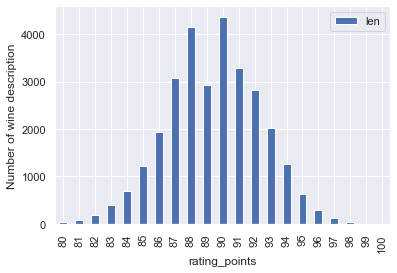

In [61]:
# check at the same rating points how many wines descriptions there have.
y = wine_df.groupby(['rating_points']).description.agg([len]).plot.bar()

plt.ylabel('Number of wine description', fontsize=12)
plt.show()

The distribution between rating_points and wine description seems normal distribution as shown in the above figure.

Now let's take a look what is relationship between these two parameters. In other words, we will build supervised machinge learning models to predict the rating points for a certain wine using wine description.

### 1. Supervised NLP models
In this supervised learning models, the description text column is used as independent variable and rating_points as target varible.The target variable-rating_points is numerical hence several regression algorithms will be applied here.

Linear algorithms:  - Linear Regression 
                    - Ridge Regression 
                    - Lasso Regression 
                    - ElasticNet Regression

Nonlinear algorithms: - Random Forest  
                      - GradientBoosting 
                      - Support Vector Machines

GridSearchCV was used to tune hyperparameters. Cross validation and metrics were applied for evaluating the models.

For the supervised models, the first step is feature engineering to convert text data into numerical form. Here, both Bag of Words (BoW) and TF-IDF from scikit-learn library were used to create document-term matrices. The scores from both techniques were compared and then decided which technique to be select for supervised models.

### BOW and TF-IDF
Now let's take a look feature engineering step: CountVectorizer (BOW) and TfidfVectorizer (TF-IDF). Also, it is worth mentioning here that for tuning CountVectorizer and TfidfVectorizer hyperparameters ngram_range, max_features, max_df and min_df were considered. The details about tuning those parameters are not shown here. And the parameters as displayed in the following sections are the best results through tuning step.

In [62]:
#BOW 

from sklearn.feature_extraction.text import CountVectorizer
Y1 = wine_df['rating_points']
x1 = wine_df['description_c']
cvect = CountVectorizer(stop_words='english',
                    lowercase=True,
                    analyzer='word', 
                    max_df=1.0, 
                    min_df=5,
                    ngram_range=(1, 1),
                    max_features=2250,
                    vocabulary=None, 
                    binary=False)

X1 = cvect.fit_transform(x1)


# Linear regression model used here for comparing BOW and TF-IDF

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# We split the dataset into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=123)
print("The number of observations in training set is {}".format(X1_train.shape[0]))
print("The number of observations in test set is {}".format(X1_test.shape[0]))

# Models
lrm = LinearRegression()

lrm.fit(X1_train, y1_train)

score = cross_val_score(lrm, X1_train, y1_train, cv=5)

print("-------------------Linear Regression Scores by BOW------------------")
print(score)
print("\nAccuracy for train set: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))
print('\nTraining set score:', lrm.score(X1_train, y1_train))
print('\nTest set score:', lrm.score(X1_test, y1_test))

The number of observations in training set is 22133
The number of observations in test set is 7378
-------------------Linear Regression Scores by BOW------------------
[0.61462086 0.60455843 0.62774801 0.6149004  0.61175232]

Accuracy for train set: 0.615 (+/- 0.015)

Training set score: 0.7060189160324305

Test set score: 0.6312742881567138


In [63]:

# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
Y = wine_df['rating_points']
x = wine_df['description_c']

tfv = TfidfVectorizer(stop_words='english',
                    lowercase=True,
                    analyzer='word', 
                    max_df=1.0, 
                    min_df=1,
                    ngram_range=(1, 1),
                    max_features=2250,
                    vocabulary=None, 
                    binary=False)

X = tfv.fit_transform(x1)

# Getting the word list.
terms = tfv.get_feature_names()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# Models
lr = LinearRegression()

lr.fit(X_train, y_train)
y_preds_test = lr.predict(X_test)

print("-----------------Linear Regression Scores by TF-IDF------------------")
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

The number of observations in training set is 22133
The number of observations in test set is 7378
-----------------Linear Regression Scores by TF-IDF------------------
Training set score: 0.7136839910670633

Test set score: 0.647320407454026


In [64]:
print("---------------Linear Regression Scores by BOW----------------")
print('Training set score_BOW:%0.3f' % lrm.score(X1_train, y1_train))
print('\nTest set score_BOW:%0.3f' % lrm.score(X1_test, y1_test))
print("\n-------------Linear Regression Scores by TF-IDF-------------")
print('Training set score_TFIDF:%0.3f' % lr.score(X_train, y_train))
print('\nTest set score_TFIDF:%0.3f' % lr.score(X_test, y_test))

---------------Linear Regression Scores by BOW----------------
Training set score_BOW:0.706

Test set score_BOW:0.631

-------------Linear Regression Scores by TF-IDF-------------
Training set score_TFIDF:0.714

Test set score_TFIDF:0.647


### Linear Regression

In [65]:

from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
#import statsmodels.api as sm

Y = wine_df['rating_points']
x = wine_df['description_c']

tfv = TfidfVectorizer(stop_words='english',
                    lowercase=True,
                    analyzer='word', 
                    max_df=1.0, 
                    min_df=1,
                    ngram_range=(1, 1),
                    max_features=2250,
                    vocabulary=None, 
                    binary=False)

X = tfv.fit_transform(x)

# Getting the word list.
terms= tfv.get_feature_names()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

import time
start_time_lr = time.perf_counter()

# Models
lr = LinearRegression()

lr.fit(X_train, y_train)
y_preds_test_l = lr.predict(X_test)

Accu_train_lr = lr.score(X_train, y_train)

print("Accu_train_lr: {}".format(Accu_train_lr))
Accu_test_lr = lr.score(X_test, y_test)

print("Accu_test_lr: {}".format(Accu_test_lr))
MAPE_lr = np.mean(np.abs((y_test - y_preds_test_l) / y_test)) * 100

runtime_lr = time.perf_counter() - start_time_lr
print("Runtime_lr: {} Seconds".format(runtime_lr))

Accu_train_lr: 0.7136839910670633
Accu_test_lr: 0.647320407454026
Runtime_lr: 0.4770045089999968 Seconds


### Ridge Linear Regression

In [66]:
from sklearn.linear_model import RidgeCV

# RidgeCV model
start_time_r = time.perf_counter()

alphas = [np.power(2.0,p) for p in np.arange(-10,10,1)]
ridge_reg = RidgeCV(alphas=alphas, cv=5)


ridge_reg.fit(X_train, y_train)

y_preds_train_r = ridge_reg.predict(X_train)
y_preds_test_r = ridge_reg.predict(X_test)

Accu_train_ridge = ridge_reg.score(X_train, y_train)
Accu_test_ridge = ridge_reg.score(X_test, y_test)
MAPE_ridge = np.mean(np.abs((y_test - y_preds_test_r) / y_test)) * 100

runtime_ridgecv = time.perf_counter() - start_time_r
print("Best alpha using built-in RidgeCV: {}".format(ridge_reg.alpha_))
print("Runtime_ridgecv: {} Seconds".format(runtime_ridgecv))

Best alpha using built-in RidgeCV: 0.5
Runtime_ridgecv: 4.662106006000002 Seconds


### Lasso Linear Regression

In [67]:
# LassoCV model

from sklearn.linear_model import LassoCV
start_time_la = time.perf_counter()

alphas = [np.power(10.0,p) for p in np.arange(-10,5,1)]
lasso_reg = LassoCV(alphas=alphas, cv=5)

lasso_reg.fit(X_train, y_train)

y_preds_train_la = lasso_reg.predict(X_train)
y_preds_test_la = lasso_reg.predict(X_test)

Accu_train_lasso = lasso_reg.score(X_train, y_train)
Accu_test_lasso = lasso_reg.score(X_test, y_test)
MAPE_lasso = np.mean(np.abs((y_test - y_preds_test_la) / y_test)) * 100

runtime_lassocv = time.perf_counter() - start_time_la
print("Best alpha using built-in LassoCV: {}".format(lasso_reg.alpha_))
print("Runtime_lassocv: {} Seconds".format(runtime_lassocv))

Best alpha using built-in LassoCV: 1e-05
Runtime_lassocv: 1303.1563190069999 Seconds


### ElasticNet Regression

In [68]:

# ElasticNetCV Model.
from sklearn.linear_model import ElasticNetCV

start_time_e = time.perf_counter()

alphas = [np.power(10.0,p) for p in np.arange(-10,4,1)]
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

y_preds_train_e = elasticnet_cv.predict(X_train)
y_preds_test_e = elasticnet_cv.predict(X_test)

Accu_train_el = elasticnet_cv.score(X_train, y_train)
Accu_test_el = elasticnet_cv.score(X_test, y_test)
MAPE_el = np.mean(np.abs((y_test - y_preds_test_e) / y_test)) * 100

runtime_elasticnetcv = time.perf_counter() - start_time_e

print("Best alpha using built-in ElasticNetCV: {}".format(elasticnet_cv.alpha_))
print("Runtime_elasticnetcv: {} Seconds".format(runtime_elasticnetcv))

Best alpha using built-in ElasticNetCV: 1e-05
Runtime_elasticnetcv: 1414.439439964 Seconds


In [69]:
alphas = [np.power(10.0,p) for p in np.arange(-10,4,1)]
alphas

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0,
 10.0,
 100.0,
 1000.0]

### Findings for Linear Algorithms

In [70]:
# Linear, Lasso, Ridge, ElasticNet models running results.
print("----------------------Linear Regression ----------------------")
print("Runtime_lr: {} Seconds".format(runtime_lr))
print("----------------------------------------")
print("Accuracy of the model in the training set is:", Accu_train_lr)
print("Accuracy of the model in the test set is:", Accu_test_lr)
print("----------------------------------------")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_l)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_l)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_l)))
print("Mean absolute percentage error of the prediction is:", MAPE_lr)

print("\n----------------------Ridge Regression----------------------")
print("Best alpha using built-in RidgeCV: {}".format(ridge_reg.alpha_))
print("----------------------------------------")
print("Runtime_ridgecv: {} Seconds".format(runtime_ridgecv))
print("----------------------------------------")
print("Accuracy of the model in the training set is:", Accu_train_ridge)
print("Accuracy of the model in the test set is:", Accu_test_ridge)
print("----------------------------------------")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_r)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_r)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_r)))
print("Mean absolute percentage error of the prediction is:", MAPE_ridge)

print("\n----------------------Lasso Regression ----------------------")
print("Best alpha using built-in LassoCV: {}".format(lasso_reg.alpha_))
print("----------------------------------------")
print("Runtime_lassocv: {} Seconds".format(runtime_lassocv))
print("Accuracy of the model in the training set is:", Accu_train_lasso)
print("Accuracy of the model in the test set is:", Accu_test_lasso)
print("----------------------------------------")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_la)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_la)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_la)))
print("Mean absolute percentage error of the prediction is:", MAPE_lasso)

print("\n----------------------ElasticNet Regression ----------------------")
print("Best alpha using built-in ElasticNetCV: {}".format(elasticnet_cv.alpha_))
print("----------------------------------------")
print("Runtime_elasticnetcv: {} Seconds".format(runtime_elasticnetcv))
print("----------------------------------------")
print("Accuracy of the model in the training set is:", Accu_train_el)
print("Accuracy of the model in the test set is:", Accu_test_el)
print("----------------------------------------")
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test_e)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_e)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_e)))
print("Mean absolute percentage error of the prediction is:", MAPE_el)

----------------------Linear Regression ----------------------
Runtime_lr: 0.4770045089999968 Seconds
----------------------------------------
Accuracy of the model in the training set is: 0.7136839910670633
Accuracy of the model in the test set is: 0.647320407454026
----------------------------------------
Mean absolute error of the prediction is: 1.3581150865457075
Mean squared error of the prediction is: 3.0112980943558836
Root mean squared error of the prediction is: 1.7353092215383066
Mean absolute percentage error of the prediction is: 1.5217111933452059

----------------------Ridge Regression----------------------
Best alpha using built-in RidgeCV: 0.5
----------------------------------------
Runtime_ridgecv: 4.662106006000002 Seconds
----------------------------------------
Accuracy of the model in the training set is: 0.7091715744353801
Accuracy of the model in the test set is: 0.6505217307115
----------------------------------------
Mean absolute error of the prediction is: 1

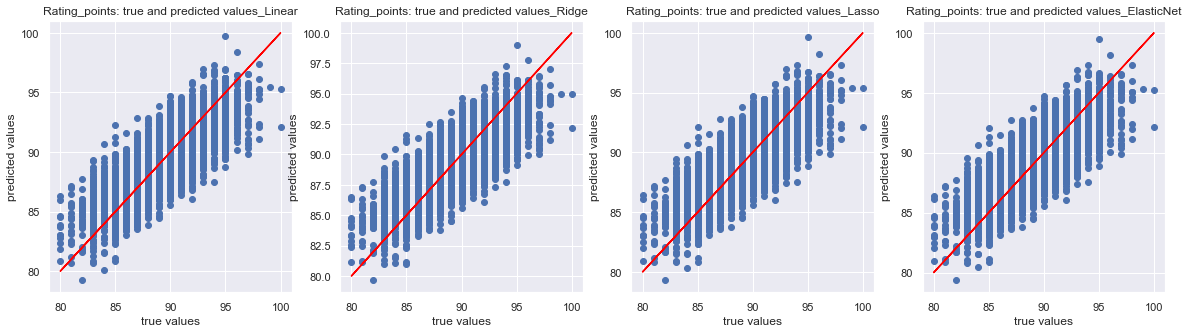

In [71]:
# Plot rating points true value and predict value for the test set.
plt.figure(figsize= (20,5))
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_preds_test_l)
plt.plot(y_test, y_test, color='red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Rating_points: true and predicted values_Linear")

plt.subplot(1, 4, 2)
plt.scatter(y_test, y_preds_test_r)
plt.plot(y_test, y_test, color='red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Rating_points: true and predicted values_Ridge")

plt.subplot(1, 4, 3)
plt.scatter(y_test, y_preds_test_la)
plt.plot(y_test, y_test, color='red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Rating_points: true and predicted values_Lasso")

plt.subplot(1, 4, 4)
plt.scatter(y_test, y_preds_test_e)
plt.plot(y_test, y_test, color='red')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Rating_points: true and predicted values_ElasticNet")

plt.show()


From the above figures and the results, mean absolute percentage error of the prediction is about 1.54% indicating that the linear algorithm for predicting rating points using description variable is a good technique to be used here.

Next, let's take a look four linear models.

In [72]:
# Check coeffcient info for Linear, Ridge, Lasso and ElasticeNet
pd.DataFrame(lr.coef_.reshape(1,-1), columns= terms).transpose().sort_values(0)

,0
harsh,-4.113649
stale,-4.090387
dull,-3.822855
lacks,-3.639057
flabby,-3.503532
...,...
noble,7.263305
stunning,7.328969
memorable,8.830231
tremendous,8.886337


In [73]:
pd.DataFrame(ridge_reg.coef_.reshape(1,-1), columns= terms).transpose().sort_values(0)

,0
harsh,-4.389396
dull,-4.133242
stale,-4.048403
lacks,-3.937066
flat,-3.703919
...,...
improve,6.593435
stunning,6.650165
superb,7.122142
tremendous,7.246675


In [74]:
pd.DataFrame(lasso_reg.coef_.reshape(1,-1), columns= terms).transpose().sort_values(0)

,0
harsh,-4.287777
stale,-4.202202
dull,-3.996761
lacks,-3.735526
flabby,-3.578437
...,...
noble,7.122535
stunning,7.290979
memorable,8.702548
tremendous,8.732873


In [75]:
pd.DataFrame(elasticnet_cv.coef_.reshape(1,-1), columns= terms).transpose().sort_values(0)

,0
harsh,-4.313252
stale,-4.152339
dull,-4.017767
lacks,-3.779630
flabby,-3.562465
...,...
improve,6.889608
stunning,7.147919
tremendous,8.383007
memorable,8.442481


In [76]:
# Check coefficient No used in the models
coeff_used_lr = np.sum(lr.coef_!=0)
coeff_used_rid = np.sum(ridge_reg.coef_!=0)
coeff_used_las = np.sum(lasso_reg.coef_!=0)
coeff_used_el = np.sum(elasticnet_cv.coef_!=0)

In [77]:
# Define Lamdel used for Ridge, Lasso and ElasticNet for the linear_comparison table used below.
lambda_rigde = ridge_reg.alpha_
lambda_lasso = lasso_reg.alpha_
lambda_elast = elasticnet_cv.alpha_

In [78]:

# Compare linear models. 
Linear_comparison = pd.DataFrame({
    'Model':['Linear', 'Ridge','Lasso', 'Elasticnet'],
    'Accuracy_train':[Accu_train_lr, Accu_train_ridge, Accu_train_lasso, Accu_train_el],
    'Accuracy_test':[Accu_test_lr, Accu_test_ridge, Accu_test_lasso, Accu_test_el],
    'MAPError':[MAPE_lr, MAPE_ridge, MAPE_lasso, MAPE_el],
    'No of Coefficient used':[coeff_used_lr, coeff_used_rid, coeff_used_las, coeff_used_el],                              
    'lambda':[0, lambda_rigde, lambda_lasso, lambda_elast],
    'Run_time':[runtime_lr, runtime_ridgecv, runtime_lassocv, runtime_elasticnetcv] 
}, columns=['Model','Accuracy_train', 'Accuracy_test','MAPError','No of Coefficient used', 'lambda', 'Run_time'])

Linear_comparison.sort_values(by='Accuracy_test', ascending=False)

,Model,Accuracy_train,Accuracy_test,MAPError,No of Coefficient used,lambda,Run_time
1,Ridge,0.709172,0.650522,1.516028,2250,0.50000,4.662106
3,Elasticnet,0.712996,0.649238,1.518229,2234,0.00001,1414.439440
2,Lasso,0.713386,0.647943,1.520787,2220,0.00001,1303.156319
0,Linear,0.713684,0.647320,1.521711,2250,0.00000,0.477005


The above linear algorithm model comparison table shows that the accurancy for train dataset and test dataset are around 0.71 and 0.65 for all four models, respectivley. Mean abolosute percentage errors of the prediction for all these four models are similar and around 1.51. There is no clearn differences amoung these four modles in terms of accurancy and mean abosolute percentage errors except Linear model has a slightly higher accurancy.

However, the number of coefficients used in above four models is slightly different. Both simple Linear regression and Ridge regression use all the features of 2250. ElasticNet and Lasso regression reduce the number of features to 2234 and 2220 as shown in the table, respetively

Ridge and Lasso regression are some kind of simple techniques to reduce model complexity and to prevent over-fitting that may result from linear regression model. In our above case, the ridge regression with lambda of 0.5 slightly shrinks the coefficients from 1.521 to 1.516.

In lasso regression, the lambda is a small value of 1e-5, it  



### Non-Linear Algorithm

Random Forest, GranientBoosting, and Support Vector Machines will be applied here to build non-linear models.

The GridSearchCV was used to tune hyperparameters. The codes of GridSearchCV were given in the last section of this notebook-Appendix because it took several hours to run GridSearchDV for each model. The parameters in the models given in the following section are the final paprameters obtained from tuning process

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
Y = wine_df['rating_points']
x = wine_df['description_c']

tfv = TfidfVectorizer(stop_words='english',
                    lowercase=True,
                    analyzer='word', 
                    max_df=1.0, 
                    min_df=1,
                    ngram_range=(1, 1),
                    max_features=2250,
                    vocabulary=None, 
                    binary=False)

X = tfv.fit_transform(x)

# Getting the word list.
terms = tfv.get_feature_names()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 22133
The number of observations in test set is 7378


### Random Forest

In [80]:
# Random Forest

start_time_rfr = time.perf_counter()

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)
y_preds_test_rfr = rfr.predict(X_test)

Accu_train_rfr = rfr.score(X_train, y_train)
Accu_test_rfr = rfr.score(X_test, y_test)

runtime_rfr = time.perf_counter() - start_time_rfr
print("Runtime_rfr: {} Seconds".format(runtime_rfr))
print('Training set score:', Accu_train_rfr)
print('Test set score:', Accu_test_rfr)

Runtime_rfr: 56.01332005799986 Seconds
Training set score: 0.9084400228963019
Test set score: 0.4944416497921442


In [81]:

# Random Forest
start_time_rfr = time.perf_counter()

rfr = RandomForestRegressor(n_estimators=400,
                            max_depth=10,
                            min_samples_split=10
                            )

rfr.fit(X_train, y_train)
y_preds_test_rfr = rfr.predict(X_test)

Accu_train_rfr = rfr.score(X_train, y_train)
Accu_test_rfr = rfr.score(X_test, y_test)

runtime_rfr = time.perf_counter() - start_time_rfr
print("Runtime_rfr: {} Seconds".format(runtime_rfr))

Runtime_rfr: 176.21000975900006 Seconds


### Gradient Boosting

In [82]:
# Gradient Boosting
start_time_gbr = time.perf_counter()

gbr = GradientBoostingRegressor(n_estimators=400,
                                max_depth=10,
                                min_samples_split=10
                               )
gbr.fit(X_train, y_train)
y_preds_test_gbr = gbr.predict(X_test)

Accu_train_gbr = gbr.score(X_train, y_train)
Accu_test_gbr = gbr.score(X_test, y_test)

runtime_gbr = time.perf_counter() - start_time_gbr
print("Runtime_gbr: {} Seconds".format(runtime_gbr))

Runtime_gbr: 169.59581337200007 Seconds


### Support Vector Machines¶


In [83]:
# Support Vector Machines
start_time_svr = time.perf_counter()

svr = SVR(kernel = 'linear', C=10)
svr.fit(X_train, y_train)
y_preds_test_svr = svr.predict(X_test)

Accu_train_svr = svr.score(X_train, y_train)
Accu_test_svr = svr.score(X_test, y_test)

runtime_svr = time.perf_counter() - start_time_svr
print("Runtime: {} Seconds".format(runtime_svr))

Runtime: 513.3979091870001 Seconds


### Findings for Non-linear Algorithms

In [84]:
print("----------------------Random Forest Scores----------------------")
print("Runtime_rfr: {} Seconds".format(runtime_rfr))
print('Training set score:', Accu_train_rfr)
print('Test set score:', Accu_test_rfr)

print("\n----------------------Gradient Boosting Scores----------------------")
print("Runtime_gbr: {} Seconds".format(runtime_gbr))
print('Training set score:', Accu_train_gbr)
print('Test set score:', Accu_test_gbr)

print("\n----------------------Support Vector Machines Scores----------------------")
print("Runtime_svr: {} Seconds".format(runtime_svr))
print('Training set score:', Accu_train_svr)
print('Test set score:', Accu_test_svr)

----------------------Random Forest Scores----------------------
Runtime_rfr: 176.21000975900006 Seconds
Training set score: 0.3930434538144574
Test set score: 0.3303501462367968

----------------------Gradient Boosting Scores----------------------
Runtime_gbr: 169.59581337200007 Seconds
Training set score: 0.9029239563369605
Test set score: 0.6227887784790602

----------------------Support Vector Machines Scores----------------------
Runtime_svr: 513.3979091870001 Seconds
Training set score: 0.697183953056091
Test set score: 0.6360197946707167


### Summary for Linear and Non-Linear Algorithms

In [85]:
# Compare linear and non-linear models. 
model_comparison = pd.DataFrame({
    'Model':['Ridge Linear', 'Random Forest','Gradient Boosting', 'Support Vector Machines'],
    'Accuracy_train':[Accu_train_ridge, Accu_train_rfr,  Accu_train_gbr, Accu_train_svr],
    'Accuracy_test':[Accu_test_ridge, Accu_test_rfr, Accu_test_gbr, Accu_test_svr],                      
    'Run_time':[runtime_ridgecv,runtime_rfr, runtime_gbr, runtime_svr]       
    }, columns=['Model','Accuracy_train', 'Accuracy_test','Run_time'])

model_comparison.sort_values(by='Accuracy_test', ascending=False)

,Model,Accuracy_train,Accuracy_test,Run_time
0,Ridge Linear,0.709172,0.650522,4.662106
3,Support Vector Machines,0.697184,0.636020,513.397909
2,Gradient Boosting,0.902924,0.622789,169.595813
1,Random Forest,0.393043,0.330350,176.210010


As displayed in the above comparison table, Ridge linear model has the highest accuracy for the test dataset. The Support Vector Machines is the second place for this rating points predicting model but it need the longest running time and lack the transparency in the process like a "black box. Gradient Boosting shows the highest accuracy for the training dataset and have the third for the test accuracy_test. Random Forest show the worst accurancy_test. Both Gradient Boosting and Random Forest have the over-fiting problem


## Summary for Supervised NLP

In this wine review project, we could make predictions fo rthe the wine rating points using description text data given by wine tasters. We have tried four linear regression models and three no-linear algorithms. The results showed that tlinear regression algorithm has a good capability to predict wine rating points. Compared with non-linear alogorithm such as random forest, gradient boosting and support vector machines, linear regression such Ridge regression has higher accuracy and also overcomes over-fitting probelms which are easisly caused in ensemble techinques such as gradient boosting model. Ridge model shrinks the coefficients and it also helps reduce the model complexity and multi-collinearity. In addition, linear regression is a simple model and easy to understand without the lack of transparency in the process.

Hence, linear algorithm-Ridge linear regression is finally selected to use making predictions for wine rating points.

## 2. Unsupervised Topic Modeling

Through unsupervise topic extraction, I am trying to find various topics that are presented in wines description written by tasters. My goal is to identity the number of topics and determine the theme of each topic. In addition, I will test whether the topic extraction can help wine consumers  make decision what kind of wines they can buy and drink now or keep and age it for later drinking. And this might also help winemakers to think about when will be the best time to sell their wines based on hte points of review from tasters

TfidfVectorizer (TF-IDF) was applied to the description text data to obtain document-term matrix.

Latent Semantic Analysis (LSA), Latent Dirichlet Allocation(LDA), and Non-Negative Matrix Factorization (NNMF) were applied for topic extraction. And the comparison were made for these three methods. The visualization package of pyLDAvis for LDA technique was also employed here.

### Top Words Using Word Cloud

(-0.5, 399.5, 199.5, -0.5)

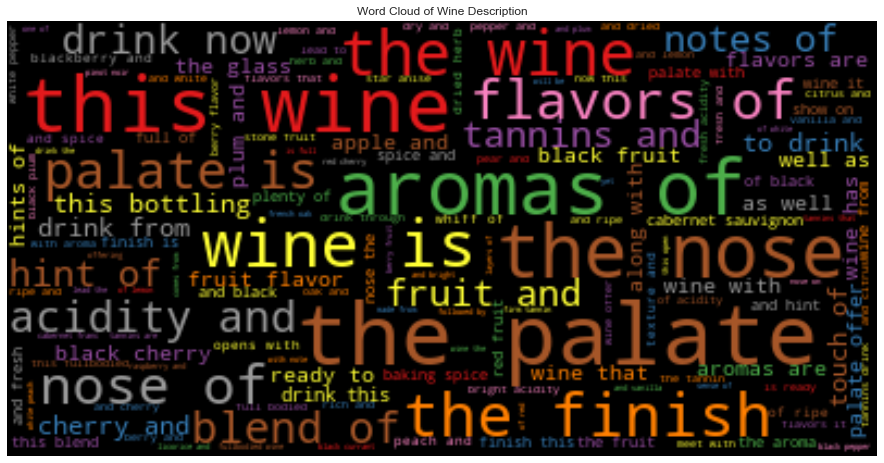

In [86]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize= (16,8))
plt.title('Word Cloud of Wine Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS, colormap='Set1')
wc.generate(' '.join(wine_df['description_c']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

Top words: place, wine, nose, finish, flavors, palate, aromas acidity, drink 

### Topic Extraction by LSA,LDA, NNMF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

x =  wine_df['description_c']
# Creating the tf-idf matrix.
tfv = TfidfVectorizer(stop_words="english",
                     lowercase=True,
                     ngram_range=(1, 1), 
                     analyzer='word', 
                     max_df=0.5, 
                     min_df=1,
                     max_features=500, 
                     vocabulary=None, 
                     binary=False
                     )

dp_tfidf = tfv.fit_transform(x)
print(dp_tfidf.shape)


# Getting the word list.
terms = tfv.get_feature_names()
#print(terms)

# Number of topics.
ntopics=3

# Linking words to topics
def word_topic(tfidf,solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=[x for x in chosenlist]
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 15

(29511, 500)


In [88]:
# LSA

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import time

start_time_lsa = time.perf_counter()

svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
dp_lsa = lsa.fit_transform(dp_tfidf)

components_lsa = word_topic(dp_tfidf, dp_lsa, terms)

topwords=pd.DataFrame()
topwords['LSA']=top_words(components_lsa, n_top_words)   

runtime = time.perf_counter() - start_time_lsa
print("Runtime_LSA: {} Seconds".format(runtime))

Runtime_LSA: 0.12724858399997174 Seconds


In [89]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

start_time_lda = time.perf_counter()

lda = LDA(n_components=ntopics, 
          doc_topic_prior=None,       # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7,         # Convergence rate.
          learning_offset=10.0,       # Causes earlier iterations to have less influence on the learning
          max_iter=10,                # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1,          # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001,      # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100,    # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1,                  # Use all available CPUs to speed up processing time.
          verbose=0,                  # amount of output to give while iterating
          random_state=0
         )

dp_lda = lda.fit_transform(dp_tfidf) 

components_lda = word_topic(dp_tfidf, dp_lda, terms)

topwords['LDA']=top_words(components_lda, n_top_words)

runtime = time.perf_counter() - start_time_lda
print("Runtime_LDA: {} Seconds".format(runtime))

Runtime_LDA: 30.542791524999757 Seconds


In [90]:
# NNMF
from sklearn.decomposition import NMF

start_time_nmf = time.perf_counter()

nmf = NMF(alpha=0.0, 
          init='nndsvdar',    # how starting value are calculated
          l1_ratio=0.0,       # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200,       # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd',        # Use Coordinate Descent to solve
          tol=0.0001,         # model will stop if tfidf-WH <= tol
          verbose=0           # amount of output to give while iterating
         )
dp_nmf = nmf.fit_transform(dp_tfidf) 

components_nmf = word_topic(dp_tfidf, dp_nmf, terms)

topwords['NNMF']=top_words(components_nmf, n_top_words)

runtime = time.perf_counter() - start_time_nmf
print("Runtime_NMF: {} Seconds".format(runtime))

Runtime_NMF: 0.3442819959996086 Seconds


In [91]:
for topic in range(ntopics):
    print('Topic {}:'.format(topic))
    print(topwords.loc[topic])

Topic 0:
               LSA             LDA           NNMF
0  flavors 1318.39    aromas 723.4   aromas 42.91
0   palate 1178.03  flavors 705.12   cherry 40.66
0   aromas 1146.03   palate 644.56  tannins 38.12
0    fruit 1067.12   cherry 611.44   palate 37.58
0   acidity 983.84  tannins 597.96    black 37.04
0    finish 918.59    black 549.91  flavors 36.32
0    tannins 904.9    fruit 537.89    berry 29.66
0     drink 898.03   finish 501.03     fruit 28.6
0      ripe 858.11      oak 470.35     plum 28.41
0      nose 836.95    berry 442.71      red 27.88
0    cherry 783.46     plum 438.29   finish 27.47
0     black 734.69      red 433.56      oak 25.62
0       red 677.23     nose 430.98    spice 24.88
0       oak 655.48    spice 394.19     nose 23.55
0     fresh 636.72  acidity 349.42    dried 20.34
Topic 1:
                 LSA               LDA             NNMF
1       drink 523.65      drink 672.43      drink 64.57
1      fruits 445.61      fruits 504.1     fruits 50.55
1       ready 

"Red wines are loved for their soft, rich, and velvety flavors, whereas white wines are loved for their zesty acidity, floral aromas, and pure fruit notes. To achieve these results, winemakers enlist two very different methods of winemaking. The largest difference between red winemaking and white winemaking is the oxidation that causes the wines to lose their floral and fruit notes in exchange for rich, nutty flavors and more smoothness. To increase oxygen, winemakers use oak barrels because they breathe and allow the wine to ingress oxygen. To reduce the exposure to oxygen, winemakers use stainless steel tanks, which ensures that wines retain their fruitiness and flower flavors." - reference 1.


Also, red wines have tannins which cause red wines tasting bitter, astringent and drying sensation. But they present in the tannic skins, seeds, and stems of grapes, good for blood vessels and lowering our risk for cardiovascular disease. Wine acidity usually is used for white wine. "A wine with more acid feels refreshing and bright. Sweeter, less acidic wines feel heavier and fuller-bodied. When someone says that wine is crisp or fresh, they are referring to its great acidity"-reference 2.


Comined with above wine basic information, also from LDA top words results, we can get three topics:

Topic 0: Red/dark color wine: (top 15 words: flavors, black, tannins, oak, red, plum, blackberry, ripe)

Topic 1: White/light color wine: (top 15 words: aromas, acidity, nose, apple, lemon, offer, fresh)

Topic 2: Drink/age (mix wines): (top words: drink, aging(27th word) - drink now or later acidity, crisp, fresh - light color ready to drink tannins, dry, rich, texture, aging - dark color, drink later or need aging)


The following sparsity section selected top words which more represented three topic to demonstrate more infomation about these three methods.

Reference 1 : https://winefolly.com/tips/red-wine-vs-white-wine-the-real-differences/
Reference 2: https://www.smallwinemakers.ca/tannins-in-wine-vs-acidity/


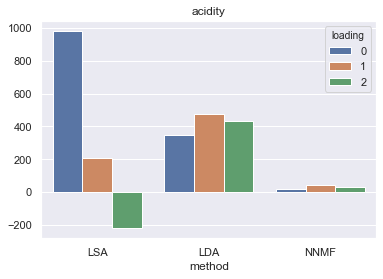

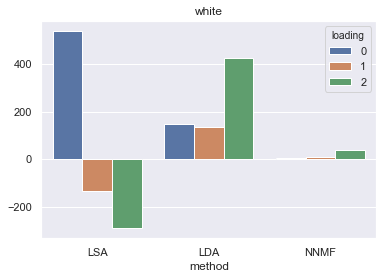

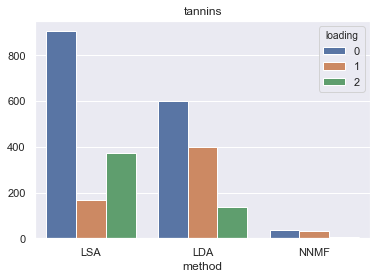

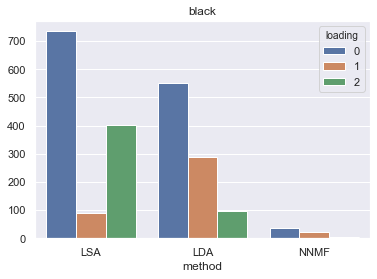

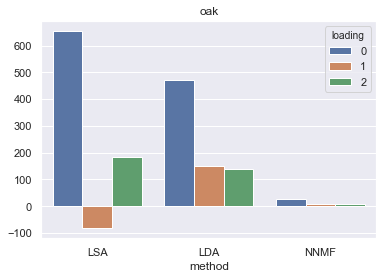

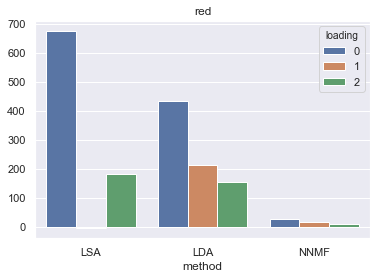

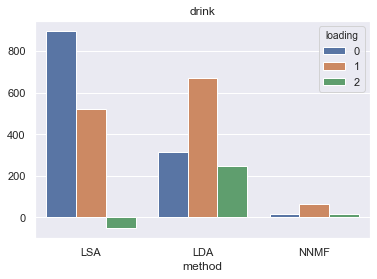

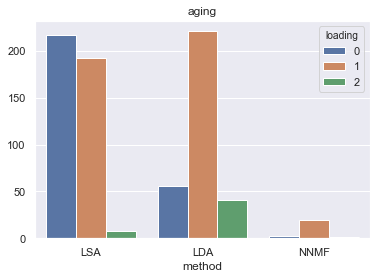

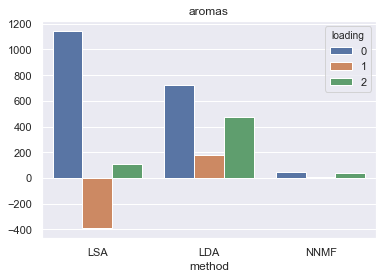

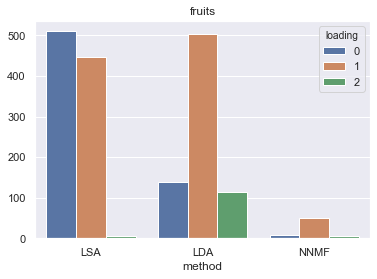

In [92]:
# 3-topic Sparsity
# Pick the words more indicating three topic to look at.
targetwords=['acidity','white', 'tannins', 'black','oak', 'red','drink', 'aging','aromas','fruits']

# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

# For each word, extracting and string the loadings for each method.
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

# Labeling the data by method and providing an ordering variable for graphing purposes. 
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], 3, axis=0)
wordloadings['loading']=[0,1,2]*3

sns.set(style="darkgrid")

for word in targetwords:
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

From sparsity results, we can see words like tannins, black, red, aromas show higher freqency in topic 1 on both LSA and LDA model. words like fruits, aging, drink, acidity show highe frequncy in topic 1 which represent the white wine.   

Further, LSA has negative values causing slightly hard understanding and interpreting as shown in the figures. For NNMF due to the reading values for words are smaller than LSA and LDA, hence the peak looks lower than those two methods. But it still can get some information about three topic and also can split into three topics.

Next we will try use the LDA visualization package pyLDAvis to take a look the topic models.

### Visualizing LDA results with pyLDAvis

In [93]:
import pyLDAvis
import pyLDAvis.sklearn
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import HTML
from IPython.display import display

pyLDAvis.enable_notebook()
prep = pyLDAvis.sklearn.prepare(lda, dp_tfidf, tfv, mds='tsne')

pyLDAvis.save_html(prep,'winetopic.html')

prep

PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
0      -632.045471 -384.325073       1        1  41.568833
2     -1209.665405  212.164124       2        1  31.580090
1     -1437.453247 -586.322510       3        1  26.851076, topic_info=    Category         Freq     Term        Total  loglift  logprob
120  Default  1277.000000    drink  1277.000000  30.0000  30.0000
175  Default   791.000000   fruits   791.000000  29.0000  29.0000
17   Default   713.000000    apple   713.000000  28.0000  28.0000
238  Default   668.000000    lemon   668.000000  27.0000  27.0000
354  Default   496.000000    ready   496.000000  26.0000  26.0000
..       ...          ...      ...          ...      ...      ...
225   Topic3   281.358831    juicy   597.173003   0.5623  -4.6664
103   Topic3   278.335126    crisp   604.387811   0.5395  -4.6772
41    Topic3   296.221297    black   923.774290   0.1775  -4.6149
153   Topic3   319.181886  flavors  1564.737206  -0.2748  -4.5403
173   Topic3   295.549597    fruit  1249.298922  -0.1266  -4.6172

[224 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3         1  0.149585     acidity
3         2  0.368872     acidity
3         3  0.481648     acidity
6         2  0.005257  aftertaste
6         3  0.993490  aftertaste
...     ...       ...         ...
497       1  0.003491       young
497       3  0.995048       young
498       2  0.997865        zest
499       2  0.992459       zesty
499       3  0.004794       zesty

[369 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

1.  In general, the wine price increases with rating points. Among the same rating points, the price varys from low to hight. which allow the winecosumer to high rating points wine with low price
2.  In different countries, the price for wine are different. The most expensive wines are produced by UK followed by Canada and Peru.
3.  Gape type variety also affects the price of wines. The most popular wines are not very expensivve indicating tht the are good for th market and most consumers' need
4.  Supervised linear Algorithm Ridge regression could be used for predicting wine rating points with wine description data. The accuracy for the model is about 65.6%
5.  Three model LSA,LDA and NNMF were proved as good techniques for topic modeling. 
7.  pyLDAis visulization is a good and sime tool to show topic extraction
8.  Three topics (red/dark wines, white/light wines, drink/age (mix wines)) were obtained from unsupervised topic extraction models. On one hand, this might help wine consumers to make decision to buy wines and drink now or age them for later drink. On the other hand, it also might help winemakers to think about when will be the optimum time to sell their wines based on the points of review from tasters.
9.  The description text data could be cleaned further to get more topics and make more sense for helping or guiding winemakers or wine consumers to make more decisions.
10. Through similarity or topic extraction for 19 tasters, it might draw some conclusions about taste features for each taster and then help winemakers or wine consumers to choose their wine tasters.

## Appendix¶
The following codes are the GridSearchCV codes for tuning hyperparameters for three non-linear algorithms: Random Forest, Gradient Boosting and Support Vector Machines.

In [94]:

from sklearn.feature_extraction.text import TfidfVectorizer
Y = wine_df['rating_points']
x = wine_df['description_c']

tfv = TfidfVectorizer(stop_words='english',
                    lowercase=True,
                    analyzer='word', 
                    max_df=1.0, 
                    min_df=1,
                    ngram_range=(1, 1),
                    max_features=2250,
                    vocabulary=None, 
                    binary=False)

X = tfv.fit_transform(x)

# Getting the word list.
terms = tfv.get_feature_names()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 22133
The number of observations in test set is 7378


In [ ]:

# Tuning hyperparameters for Random Forest.
from sklearn.model_selection import GridSearchCV

start_time_rfr = time.perf_counter()
rfr_params = {#"criterion": ['gini', 'entropy'],
             "n_estimators": [20, 200, 400],
              "max_depth": [5, 10, 15],
              "min_samples_split": [3, 5, 10],
              #"min_samples_leaf": [5, 10],
             }
rfr = ensemble.RandomForestRegressor()

clf_rfr = GridSearchCV(rfr, rfr_params, cv=5)
clf_rfr.fit(X_train, y_train)

runtime_rfr = time.perf_counter() - start_time_rfr
print("----------------------Random Forest Scores----------------------")
print("Runtime: {} Seconds".format(runtime_rfr))
print(clf_rfr.best_params_)
print('\nTraining set score:', clf_rfr.score(X_train, y_train))
print('\nTest set score:', clf_rfr.score(X_test, y_test))

In [ ]:
# Gradient Boosting
start_time_gbr = time.perf_counter()

gbr = GradientBoostingRegressor(n_estimators=500,
                                max_depth=15,
                                min_samples_split=10
                               )
gbr.fit(X_train, y_train)
y_preds_test_gbr = gbr.predict(X_test)

runtime_gbr = time.perf_counter() - start_time_gbr
print("Runtime_gbr: {} Seconds".format(runtime_gbr))
print('Training set score:', gbr.score(X_train, y_train))
print('\nTest set score:', gbr.score(X_test, y_test))

In [ ]:
# Tuning hyperparameters for Gradient Boosting. 
start_time_gbr = time.perf_counter()

gbr_params = {"n_estimators": [20, 200, 400],
              "max_depth": [5,10,15],
              "min_samples_split": [5,10]}
gbr = ensemble.GradientBoostingRegressor()

clf_gbr = GridSearchCV(gbr, gbr_params, cv=5)
clf_gbr.fit(X_train, y_train)
runtime_gbr = time.perf_counter() - start_time_gbr

print("----------------------Gradient Boosting Scores----------------------")
print("Runtime: {} Seconds".format(runtime_gbr))
print(clf_gbr.best_params_)
print('Training set score:', clf_gbr.score(X_train, y_train))
print('\nTest set score:', clf_gbr.score(X_test, y_test))

In [ ]:
start_time_svr = time.perf_counter()

svr = SVR(kernel = 'linear', C=10)
svr.fit(X_train, y_train)

runtime_svr = time.perf_counter() - start_time_svr
print("----------------------Support Vector Machines Scores----------------------")
print("Runtime: {} Seconds".format(runtime_svr))
print('Training set score:', svr.score(X_train, y_train))
print('\nTest set score:', svr.score(X_test, y_test))

In [ ]:
start_time_svr = time.perf_counter()
svr_params = {'kernel': ['linear', 'rbf'],
              'C': [ 1, 10 ],
              'gamma': [0.1, 1, 10]}
svr = SVR()

clf_svr = GridSearchCV(svr, svr_params, cv=5) 
clf_svr.fit(X_train, y_train)

runtime_svr = time.perf_counter() - start_time_svr
print("------------------Support Vector Machines Scores-------------------")
print("Runtime: {} Seconds".format(runtime_svr))
print(clf_svr.best_params_)
print('Training set score:', clf_svr.score(X_train, y_train))
print('\nTest set score:', clf_svr.score(X_test, y_test)